In [1]:
import sourmash
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product, combinations

In [8]:
# read taxonomy into useful sourmash format
from sourmash.tax import tax_utils
from sourmash.lca import lca_utils
taxdb = 'gtdb-rs207.taxonomy.csv'
#taxdb = 'gtdb-rs207.taxonomy.reps.csv'
tax_assign = tax_utils.MultiLineageDB.load([taxdb],
                                           keep_full_identifiers=False,
                                           keep_identifier_versions=False )

In [3]:
# read in signature info
siginfocsv = "gtdb-rs207.genomic.k31.describe.csv"
sigInf = pd.read_csv(siginfocsv)
sigInf['ident'] = sigInf['name'].str.split(' ', expand=True)[0]
sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes,ident
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,/dev/fd/63,CC0,4594,GCF_000814905.1
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",/dev/fd/63,CC0,2436,GCA_007116955.1
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,/dev/fd/63,CC0,5847,GCF_017948435.1
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",/dev/fd/63,CC0,3332,GCA_017995835.1
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,/dev/fd/63,CC0,6993,GCF_001981135.1


In [12]:
sigInf['lineage'] = sigInf['ident'].apply(lambda x: tax_utils.find_match_lineage(x, tax_assign))
sigInf['lineage_str'] = sigInf['lineage'].apply(lambda x: lca_utils.display_lineage(x))
sigInf[['superkingdom', "phylum", "class", "order", "family", "genus", 'species']] = sigInf['lineage_str'].str.split(';', expand=True)

sigInf.head()

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,...,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus,species
0,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bce936040b05e58a53be0974cbdef152,31,DNA,0,1000,4575,42,1,GCF_000814905.1 Enterobacter sp. Bisph1 strain...,...,GCF_000814905.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Kosakonia,s__Kosakonia sp000814905
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",...,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Vibrionaceae,g__Vibrio,s__Vibrio sp007124475
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,...,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas_E,s__Pseudomonas_E putida_H
3,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c125d78f91b38497285d44e1b1d5405,31,DNA,0,1000,3306,42,1,"GCA_017995835.1 Amaricoccus sp., ASM1799583v1",...,GCA_017995835.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Amaricoccus,s__Amaricoccus sp017995835
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,...,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Burkholderia,s__Burkholderia mallei


In [55]:
bactInf = sigInf[sigInf["superkingdom"] == "d__Bacteria"]
archInf = sigInf[sigInf["superkingdom"] == "d__Archaea"]

In [160]:
# find taxonomic groups with most genomes, pick first 10 bacteria, 5 archaea
most_common_bact = bactInf.groupby("species")['ident'].count().sort_values(ascending=False)[:15].reset_index()
most_common_bact

,species,ident
0,s__Escherichia coli,26859
1,s__Staphylococcus aureus,13059
2,s__Salmonella enterica,12285
3,s__Klebsiella pneumoniae,11294
4,s__Streptococcus pneumoniae,8452
5,s__Mycobacterium tuberculosis,6836
6,s__Pseudomonas aeruginosa,5623
7,s__Acinetobacter baumannii,5417
8,s__Clostridioides difficile,2225
9,s__Enterococcus_B faecium,2177


In [161]:
most_common_arch = archInf.groupby("species")['ident'].count().sort_values(ascending=False)[:5].reset_index()
most_common_arch

,species,ident
0,s__Methanosarcina mazei,73
1,s__Sulfolobus acidocaldarius,56
2,s__Bog-38 sp003162175,29
3,s__Methanobrevibacter_A sp900314695,27
4,s__Saccharolobus islandicus,24


In [162]:
most_common_species_list =  most_common_bact['species'].tolist() + most_common_arch['species'].tolist()
most_common_species_list

['s__Escherichia coli',
 's__Staphylococcus aureus',
 's__Salmonella enterica',
 's__Klebsiella pneumoniae',
 's__Streptococcus pneumoniae',
 's__Mycobacterium tuberculosis',
 's__Pseudomonas aeruginosa',
 's__Acinetobacter baumannii',
 's__Clostridioides difficile',
 's__Enterococcus_B faecium',
 's__Streptococcus pyogenes',
 's__Neisseria meningitidis',
 's__Listeria monocytogenes',
 's__Campylobacter_D jejuni',
 's__Enterococcus faecalis',
 's__Methanosarcina mazei',
 's__Sulfolobus acidocaldarius',
 's__Bog-38 sp003162175',
 's__Methanobrevibacter_A sp900314695',
 's__Saccharolobus islandicus']

In [163]:
# load representative genome info
reps = 'gtdb-rs207.taxonomy.reps.csv'
repD = pd.read_csv(reps)
rep_idents = repD['ident'].tolist()
len(rep_idents)

65740

In [164]:
# subset to just reps and just NOT reps
repInf = sigInf[sigInf['ident'].isin(rep_idents)]
print(repInf.shape)
# subset to just reps and just NOT reps
norepInf = sigInf[~sigInf['ident'].isin(rep_idents)]
print(norepInf.shape)

(65740, 23)
(251802, 23)


In [165]:
rep_genomes = repInf[repInf['species'].isin(most_common_species_list)]
rep_genomes

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,...,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus,species
15250,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,aab516a5d323d56ae5c598ec613300ca,31,DNA,0,1000,2512,42,1,GCF_001544255.1 Enterococcus faecium NBRC 1004...,...,GCF_001544255.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Enterococcaceae,g__Enterococcus_B,s__Enterococcus_B faecium
35071,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,1ddae144af1aa3c7cf4dd488d90eed3e,31,DNA,0,1000,1841,42,1,GCF_002055535.1 Streptococcus pyogenes strain=...,...,GCF_002055535.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus pyogenes
46590,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,d88f3c512ece432b111f094181484852,31,DNA,0,1000,5481,42,1,GCF_000742135.1 Klebsiella pneumoniae strain=A...,...,GCF_000742135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella pneumoniae
48445,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,af9b6270d2089ff0e2dee3539bdea6e8,31,DNA,0,1000,2666,42,1,GCF_000022485.1 Sulfolobus islandicus Y.N.15.5...,...,GCF_000022485.1,"((superkingdom, d__Archaea), (phylum, p__Therm...",d__Archaea;p__Thermoproteota;c__Thermoproteia;...,d__Archaea,p__Thermoproteota,c__Thermoproteia,o__Sulfolobales,f__Sulfolobaceae,g__Saccharolobus,s__Saccharolobus islandicus
73314,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,9754fb0c075903281ed9c26c3ebde779,31,DNA,0,1000,4340,42,1,GCF_000195955.2 Mycobacterium tuberculosis H37...,...,GCF_000195955.2,"((superkingdom, d__Bacteria), (phylum, p__Acti...",d__Bacteria;p__Actinobacteriota;c__Actinomycet...,d__Bacteria,p__Actinobacteriota,c__Actinomycetia,o__Mycobacteriales,f__Mycobacteriaceae,g__Mycobacterium,s__Mycobacterium tuberculosis
88836,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,a5ebf5627a166d02c647709674b0f412,31,DNA,0,1000,3958,42,1,GCF_009759685.1 Acinetobacter baumannii strain...,...,GCF_009759685.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Moraxellaceae,g__Acinetobacter,s__Acinetobacter baumannii
101505,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,bb217474c348bbe1c7ce2dad76cea683,31,DNA,0,1000,6363,42,1,GCF_001457615.1 Pseudomonas aeruginosa strain=...,...,GCF_001457615.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa
115162,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,fab5f1f84cda4e558344ecb9a786fe91,31,DNA,0,1000,4073,42,1,GCF_001077535.1 Clostridioides difficile ATCC ...,...,GCF_001077535.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Peptostreptococcales,f__Peptostreptococcaceae,g__Clostridioides,s__Clostridioides difficile
146912,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,fcda1e6aafc3879c96d3f3928b2005ec,31,DNA,0,1000,2112,42,1,GCF_001457635.1 Streptococcus pneumoniae strai...,...,GCF_001457635.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus pneumoniae
175532,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,185d23ed7456f793b36f5c5f7f0a4c80,31,DNA,0,1000,2749,42,1,G

In [166]:
norep_genomes = norepInf[norepInf['species'].isin(most_common_species_list)].groupby('species').nth(0).reset_index()
norep_genomes

,species,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,...,sum_hashes,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus
0,s__Acinetobacter baumannii,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,da2c54d34319498535f0d354b9e9752e,31,DNA,0,1000,3933,42,1,...,3955,GCA_900478005.2,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Moraxellaceae,g__Acinetobacter
1,s__Bog-38 sp003162175,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,21d32d17258e01f15d3e0cfe6842d4c0,31,DNA,0,1000,1654,42,1,...,1658,GCA_003142655.1,"((superkingdom, d__Archaea), (phylum, p__Halob...",d__Archaea;p__Halobacteriota;c__Bog-38;o__Bog-...,d__Archaea,p__Halobacteriota,c__Bog-38,o__Bog-38,f__Bog-38,g__Bog-38
2,s__Campylobacter_D jejuni,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,a5a553c651cfd2df6abd1a1b7ae30f7c,31,DNA,0,1000,1744,42,1,...,1747,GCF_001227665.1,"((superkingdom, d__Bacteria), (phylum, p__Camp...",d__Bacteria;p__Campylobacterota;c__Campylobact...,d__Bacteria,p__Campylobacterota,c__Campylobacteria,o__Campylobacterales,f__Campylobacteraceae,g__Campylobacter_D
3,s__Clostridioides difficile,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,b883b2c412f51dc22774d1566bc50f6e,31,DNA,0,1000,3928,42,1,...,3937,GCF_005786645.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Peptostreptococcales,f__Peptostreptococcaceae,g__Clostridioides
4,s__Enterococcus faecalis,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,cc3dfd22f56b696315484deeefdf1d4b,31,DNA,0,1000,2909,42,1,...,2935,GCF_009913815.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Enterococcaceae,g__Enterococcus
5,s__Enterococcus_B faecium,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,b07c6f2ae341bb9f59072fdf68886025,31,DNA,0,1000,2836,42,1,...,2914,GCF_000395905.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Enterococcaceae,g__Enterococcus_B
6,s__Escherichia coli,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,aa0177445844d109679e91c99aba5cef,31,DNA,0,1000,5214,42,1,...,5278,GCF_002224665.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia
7,s__Klebsiella pneumoniae,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,e27cad11ff8bfb6a652c7109d09e53ef,31,DNA,0,1000,5664,42,1,...,5697,GCF_015627065.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella
8,s__Listeria monocytogenes,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,a96484b496bc5c677eedad809aebf4fc,31,DNA,0,1000,3037,42,1,...,3062,GCF_001760575.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Listeriaceae,g__Listeria
9,s__Methanobrevibacter_A sp900314695,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,f36a554206ff850b885e63d1319b60cd,31,DNA,0,1000,2100,42,1,...,2104,GCA_902763115.1,"((superkingdom, d__Archaea), (phylum, p__Metha...",d__Archaea;p__Methanobacteriota;c__Methanobact...,d__Archaea,p__Methanobacteriota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A


In [167]:
comparison_idents = rep_genomes['ident'].tolist() + norep_genomes['ident'].tolist()
comparison_idents

['GCF_001544255.1',
 'GCF_002055535.1',
 'GCF_000742135.1',
 'GCF_000022485.1',
 'GCF_000195955.2',
 'GCF_009759685.1',
 'GCF_001457615.1',
 'GCF_001077535.1',
 'GCF_001457635.1',
 'GCF_001027105.1',
 'GCA_003162175.1',
 'GCA_900314695.1',
 'GCF_003697165.2',
 'GCF_000970205.1',
 'GCF_900638555.1',
 'GCF_000006945.2',
 'GCF_900187225.1',
 'GCF_001457695.1',
 'GCF_000012285.1',
 'GCF_000392875.1',
 'GCA_900478005.2',
 'GCA_003142655.1',
 'GCF_001227665.1',
 'GCF_005786645.1',
 'GCF_009913815.1',
 'GCF_000395905.1',
 'GCF_002224665.1',
 'GCF_015627065.1',
 'GCF_001760575.1',
 'GCA_902763115.1',
 'GCF_000979375.1',
 'GCF_003397785.1',
 'GCF_900043315.1',
 'GCF_003835175.1',
 'GCF_000189575.1',
 'GCF_003117635.1',
 'GCF_001204095.1',
 'GCF_002081355.1',
 'GCF_900990875.1',
 'GCF_001560085.1']

In [168]:
# those are the representative genomes and another, nonrep for each of the most common species.
# we also need: genome in same genus, family, class, phylum for each


In [169]:
#add genome_idents
compare_idents = comparison_idents
comparisons = []
num_missed=0
for ident in comparison_idents:
    ident_row = sigInf[sigInf['ident']== ident]
    taxlist = tax_utils.ascending_taxlist(include_strain=False)
    prev_tax_at_rank = ""
    prev_rank = "species"
    for rank in taxlist:
        if rank == 'species':
            continue
        else:
            tax_at_rank = list(ident_row[rank])[0]
            #print(tax_at_rank)
            this_info = norepInf[(norepInf[rank] == tax_at_rank)  & (norepInf[prev_rank] != prev_tax_at_rank)] # & (~norepInf['ident'].isin(compare_idents))
            if not this_info.empty:
                new_ident = this_info['ident'].tolist()[0]
                this_comparison = (ident, new_ident)
                prev_tax_at_rank = tax_at_rank
                prev_rank = rank
                comparisons.append(this_comparison)
                #compare_idents.append(new_ident)
            else:
                num_missed+=1

print(f"num_comparisons:{len(comparisons)}")
print(f"num_missed: {num_missed}")

num_comparisons:218
num_missed: 22


In [174]:
comp = pd.DataFrame.from_records(comparisons, columns=["identA", "identB"])
comp['comparison_reason'] = 'evolpath_for_common_species'
comp

,identA,identB,comparison_reason
0,GCF_001544255.1,GCF_000395905.1,evolpath_for_common_species
1,GCF_001544255.1,GCF_009913815.1,evolpath_for_common_species
2,GCF_001544255.1,GCF_900111215.1,evolpath_for_common_species
3,GCF_001544255.1,GCF_001204095.1,evolpath_for_common_species
4,GCF_001544255.1,GCA_007116955.1,evolpath_for_common_species
...,...,...,...
213,GCF_001560085.1,GCF_000189575.1,evolpath_for_common_species
214,GCF_001560085.1,GCA_002496045.1,evolpath_for_common_species
215,GCF_001560085.1,GCA_000494205.1,evolpath_for_common_species
216,GCF_001560085.1,GCF_003948265.1,evolpath_for_common_species


In [175]:
comp.to_csv("gtdb-rs207.common-sp20-evolpaths.csv", index=False)

In [91]:
genera = list(set(rep_genomes["genus"].tolist()))
print(genera)
families = list(set(rep_genomes["family"].tolist()))
print(families)
classes = list(set(rep_genomes["class"].tolist()))
print(classes)
phyla = list(set(rep_genomes["phylum"].tolist()))
print(phyla)

['g__Escherichia', 'g__Bog-38', 'g__Pseudomonas', 'g__Streptococcus', 'g__Salmonella', 'g__Staphylococcus', 'g__Mycobacterium', 'g__Sulfolobus', 'g__Klebsiella', 'g__Methanosarcina']
['f__Mycobacteriaceae', 'f__Enterobacteriaceae', 'f__Bog-38', 'f__Sulfolobaceae', 'f__Methanosarcinaceae', 'f__Pseudomonadaceae', 'f__Streptococcaceae', 'f__Staphylococcaceae']
['c__Methanosarcinia', 'c__Bacilli', 'c__Actinomycetia', 'c__Thermoproteia', 'c__Bog-38', 'c__Gammaproteobacteria']
['p__Thermoproteota', 'p__Halobacteriota', 'p__Firmicutes', 'p__Actinobacteriota', 'p__Proteobacteria']


In [112]:
#add genome_idents
compare_idents = comparison_idents
for (rank, rank_list) in [("genus", genera),("family", families), ("class", classes), ("phylum", phyla)]:
    n_to_choose = 1
    add_genomes = norepInf[(norepInf[rank].isin(rank_list)) & (~norepInf['ident'].isin(compare_idents))].groupby(rank).nth(0).reset_index()
    addl_idents_list = add_genomes['ident'].tolist()
    # just double check
    for x in addl_idents_list:
        if x in compare_idents:
            print(x)
    compare_idents+=addl_idents_list

In [114]:
len(compare_idents)

213

In [119]:
compareD = sigInf[sigInf['ident'].isin(compare_idents)]
compareD

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,...,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus,species
1,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,2c46c657d26265d4ccc87b66a343e44e,31,DNA,0,1000,2404,42,1,"GCA_007116955.1 Vibrio sp., ASM711695v1",...,GCA_007116955.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Vibrionaceae,g__Vibrio,s__Vibrio sp007124475
2,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,eea831872487c41dfc2fb613f493ba35,31,DNA,0,1000,5828,42,1,GCF_017948435.1 Pseudomonas protegens strain=M...,...,GCF_017948435.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas_E,s__Pseudomonas_E putida_H
4,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,dfc179236087a1222dbe18a61483fa61,31,DNA,0,1000,6960,42,1,GCF_001981135.1 Burkholderia pseudomallei stra...,...,GCF_001981135.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Burkholderia,s__Burkholderia mallei
5,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,e65bb2f64d95f0be5ecc2279ef645b40,31,DNA,0,1000,2222,42,1,GCF_900111215.1 Streptococcus gallolyticus str...,...,GCF_900111215.1,"((superkingdom, d__Bacteria), (phylum, p__Firm...",d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__Streptococcus gallolyticus
6,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,3377ebdb0e0c29630d0ee2b54a92d5a3,31,DNA,0,1000,2155,42,1,GCF_001084125.1 Neisseria gonorrhoeae strain=G...,...,GCF_001084125.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Neisseriaceae,g__Neisseria,s__Neisseria gonorrhoeae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182842,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,f870c42ead1176722330fa626b39acac,31,DNA,0,1000,1862,42,1,"GCA_003162175.1 Euryarchaeota archaeon, 201009...",...,GCA_003162175.1,"((superkingdom, d__Archaea), (phylum, p__Halob...",d__Archaea;p__Halobacteriota;c__Bog-38;o__Bog-...,d__Archaea,p__Halobacteriota,c__Bog-38,o__Bog-38,f__Bog-38,g__Bog-38,s__Bog-38 sp003162175
199565,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,60bfe150353edefcbd7db7314951359d,31,DNA,0,1000,4911,42,1,GCF_003697165.2 Escherichia coli DSM 30083 = J...,...,GCF_003697165.2,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli
216866,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,b62e02c7cad9e63b055f9cd2cb4b160c,31,DNA,0,1000,3930,42,1,GCF_000970205.1 Methanosarcina mazei S-6 strai...,...,GCF_000970205.1,"((superkingdom, d__Archaea), (phylum, p__Halob...",d__Archaea;p__Halobacteriota;c__Methanosarcini...,d__Archaea,p__Halobacteriota,c__Methanosarcinia,o__Methanosarcinales,f__Methanosarcinaceae,g__Methanosarcina,s__Methanosarcina mazei
234993,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,14e81c7b01dc29650e3dea02407c3361,31,DNA,0,1000,4900,42,1,GCF_000006945.2 Salmonella enterica subsp. ent...,...,GCF_000006945.2,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Salmonella,s__Salmonella enterica


<AxesSubplot: xlabel='n_hashes', ylabel='Density'>

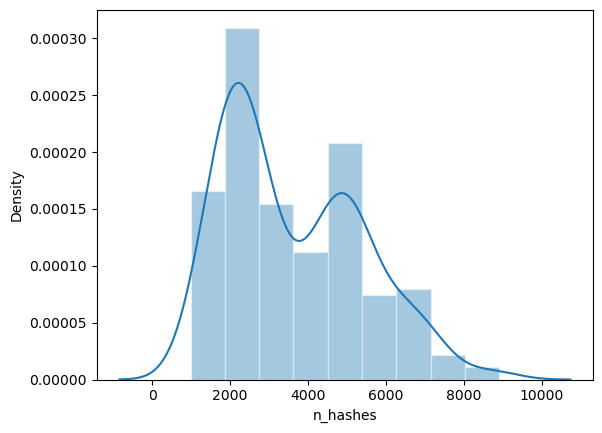

In [120]:
sns.histplot(compareD['n_hashes'], kde=True, alpha=.4, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, .4))


In [121]:
compareD.nlargest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,...,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus,species
42,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,ce23fd008ea15e84ee61781ee6efb85d,31,DNA,0,1000,8910,42,1,"GCF_902499025.1 Burkholderia lata, ASM90249902v1",...,GCF_902499025.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Burkholderia,s__Burkholderia lata_B
30,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,0431dc30ceeaa0bb83537433fb1c0dba,31,DNA,0,1000,8743,42,1,GCF_005502655.1 Burkholderia sp. 4NA327C6 stra...,...,GCF_005502655.1,"((superkingdom, d__Bacteria), (phylum, p__Prot...",d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Burkholderia,s__Burkholderia contaminans


In [122]:
compareD.nsmallest(2, 'n_hashes')

,signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,...,ident,lineage,lineage_str,superkingdom,phylum,class,order,family,genus,species
39749,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,782caa2a27d9d7ec42fea16ea3d934aa,31,DNA,0,1000,987,42,1,"GCA_003167795.1 Euryarchaeota archaeon, 201107...",...,GCA_003167795.1,"((superkingdom, d__Archaea), (phylum, p__Halob...",d__Archaea;p__Halobacteriota;c__Bog-38;o__Bog-...,d__Archaea,p__Halobacteriota,c__Bog-38,o__Bog-38,f__Bog-38,g__Bog-38,s__Bog-38 sp003139855
45223,/group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-...,e8085d9e6c1c2627d810a0b6ef52a54d,31,DNA,0,1000,1045,42,1,"GCA_017883525.1 archaeon, ASM1788352v1",...,GCA_017883525.1,"((superkingdom, d__Archaea), (phylum, p__Halob...",d__Archaea;p__Halobacteriota;c__Bog-38;o__Bog-...,d__Archaea,p__Halobacteriota,c__Bog-38,o__Bog-38,f__Bog-38,g__Bog-38,s__Bog-38 sp003170935


In [ ]:
## Next, look at some largest and smallest genomes/signatures, representatives only
